In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("0616_300Microns.xlsx")
df

,Cab.Bridge,Voltage steps,V(PZT),Real_V,M-E Sensor,ME_D,ME_A_dis,Fringes,fringe_D,Fringe_A_dis,Time
0,29369,NaN,-0.512,-5.12,266.37,NaN,NaN,NaN,NaN,NaN,03:05:00
1,29769,400.0,1.162,11.62,272.97,6.60,6.60,21.0,6.6444,6.6444,03:13:00
2,30169,400.0,2.156,21.56,279.61,6.64,13.24,20.0,6.3280,12.9724,03:17:00
3,30569,400.0,2.564,25.64,286.28,6.67,19.91,20.0,6.3280,19.3004,03:20:00
4,30969,400.0,2.916,29.16,292.99,6.71,26.62,20.0,6.3280,25.6284,03:23:00
5,31369,400.0,3.273,32.73,299.72,6.73,33.35,21.0,6.6444,32.2728,03:25:00
6,31769,400.0,3.679,36.79,306.49,6.77,40.12,22.0,6.9608,39.2336,03:27:00
7,32169,400.0,4.012,40.12,313.27,6.78,46.90,21.0,6.6444,45.8780,03:30:00


In [3]:
#indexing ME accumulated displacement column and row
ME_A_dis = df["ME_A_dis"][1:]
print(ME_A_dis)

1     6.60
2    13.24
3    19.91
4    26.62
5    33.35
6    40.12
7    46.90
Name: ME_A_dis, dtype: float64


In [4]:
# indexing fringe dis. column
fringe_A_dis = df["Fringe_A_dis"][1:]
print(fringe_A_dis)

1     6.6444
2    12.9724
3    19.3004
4    25.6284
5    32.2728
6    39.2336
7    45.8780
Name: Fringe_A_dis, dtype: float64


In [5]:
# indexing PZT voltage column 
real_V = df["Real_V"][1:]
print(real_V)

1    11.62
2    21.56
3    25.64
4    29.16
5    32.73
6    36.79
7    40.12
Name: Real_V, dtype: float64


In [6]:
import matplotlib.pyplot as plt
plt.close("all")
#%matplotlib notebook makes the plot interactive
%matplotlib notebook

In [7]:
import numpy as np

In [8]:
from scipy import stats

In [9]:
x = fringe_A_dis
y = ME_A_dis

In [10]:
info = stats.linregress(x,y)

In [11]:
print(info)

LinregressResult(slope=1.0264984432531956, intercept=-0.001551683007694038, rvalue=0.9998923838093536, pvalue=2.3073997401070216e-10, stderr=0.00673538077990204, intercept_stderr=0.19599431354734848)


<IPython.core.display.Javascript object>


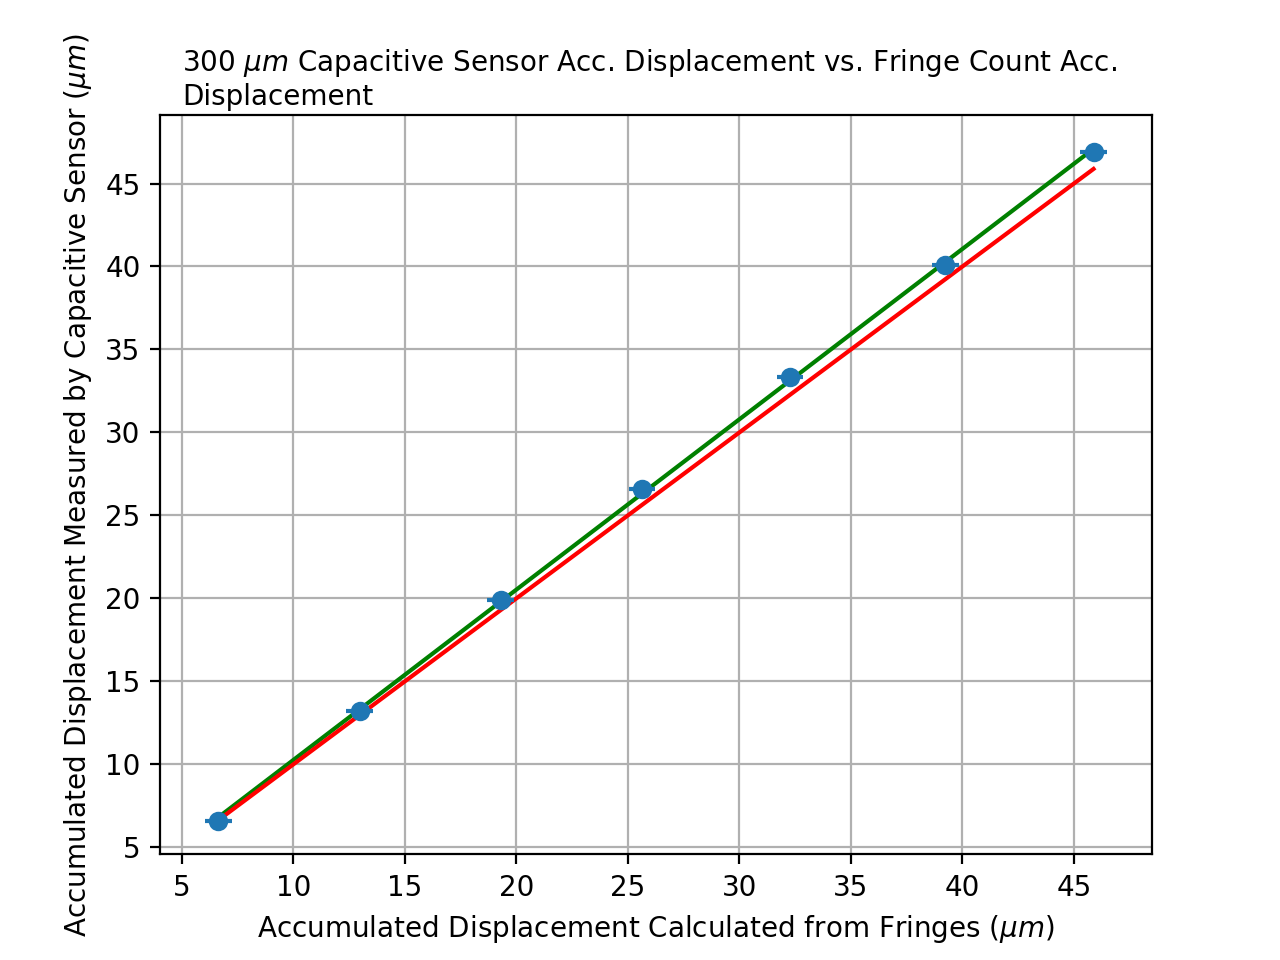

<function matplotlib.pyplot.show(block=None)>

In [12]:
#x error is 0.6
#y error is from std dev from time series plot
xerror = np.full_like(x,0.6)
yerror = np.full_like(y,0)

# plot of linear regression of data
plt.plot(x,x*info.slope+info.intercept,c = "green")

# plot of fringe displacement data, our "true" measurement
plt.plot(x,x,c = "red")

plt.errorbar(x,y,xerr=xerror,yerr=yerror,fmt = 'o')#,c = "orange")


plt.xlabel('Accumulated Displacement Calculated from Fringes ($\mu m$)')
plt.ylabel('Accumulated Displacement Measured by Capacitive Sensor ($\mu m$)')

t = '300 $\mu m$ Capacitive Sensor Acc. Displacement vs. Fringe Count Acc. Displacement'
plt.text(5, 50, t, ha='left', rotation=0, wrap=True)





plt.grid()
plt.show

<IPython.core.display.Javascript object>


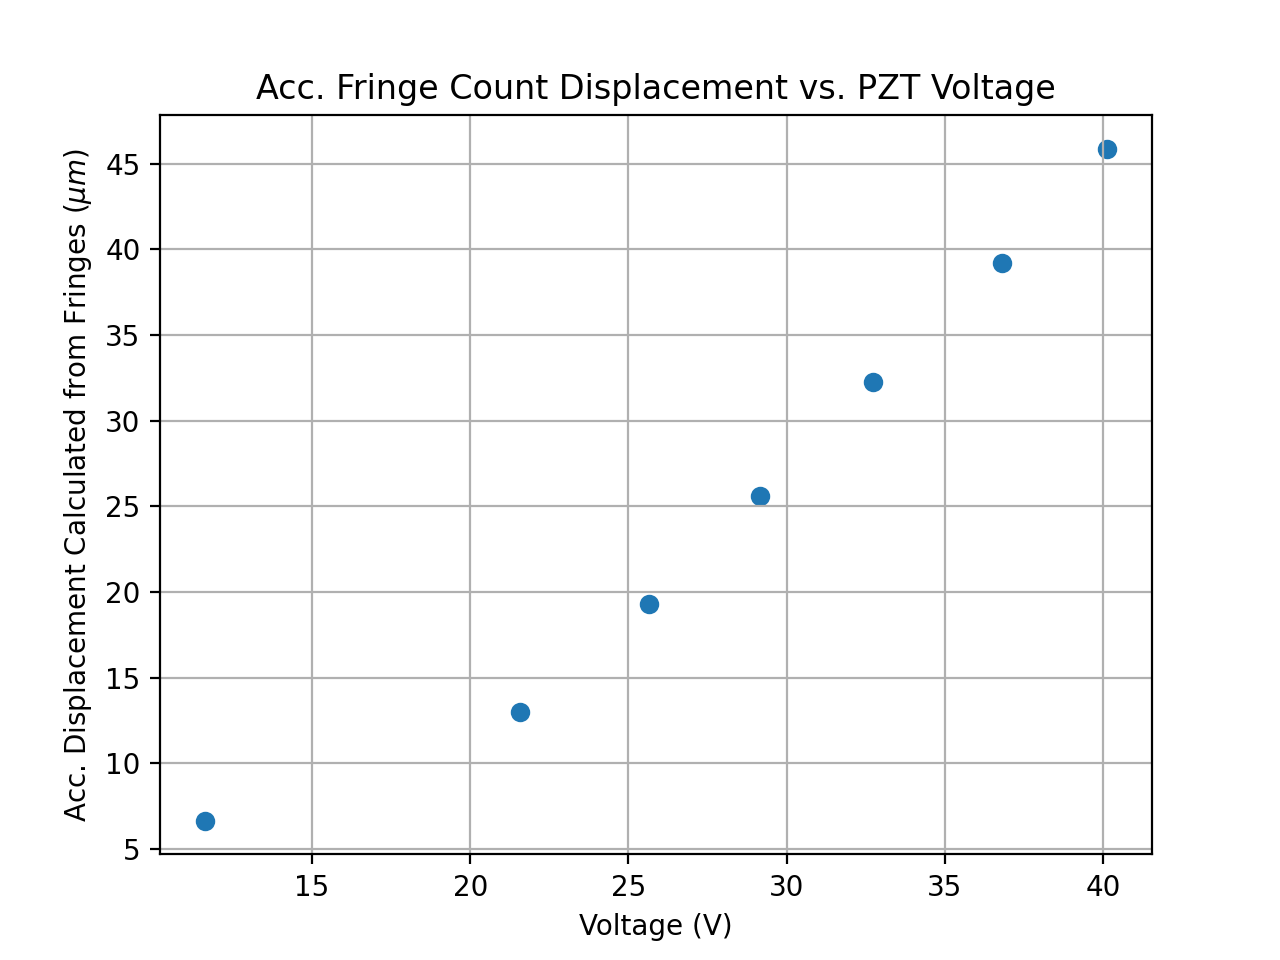

<function matplotlib.pyplot.show(block=None)>

In [13]:
plt.close("all")
x = real_V
y = fringe_A_dis

plt.scatter(x,y)


plt.xlabel('Voltage (V)')
plt.ylabel('Acc. Displacement Calculated from Fringes ($\mu m$)')
plt.title('Acc. Fringe Count Displacement vs. PZT Voltage')


plt.grid()
plt.show